# fitting to psd with alpha buffer

In [1]:
%matplotlib inline
import scipy as sp
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import io
from scipy import signal
from sklearn import linear_model

In [2]:
datafile = sp.io.loadmat('../data/ecog-voytek.mat')
srate = datafile['srate'][0][0]
data  = datafile['data'][0]

In [3]:
print("Length of data:   {}".format(len(data)))
print("Sampling rate:    {:.2f} Hz".format(srate))
print("Duration of data: {:.2f} seconds".format(len(data) / srate))

Length of data:   1476035
Sampling rate:    1017.25 Hz
Duration of data: 1451.00 seconds


In [4]:
f, psd = sp.signal.welch(data, srate, nperseg=srate*2, noverlap=srate)
filtered_psd = psd.copy()
filtered_psd = np.delete(psd, range(7*2, 14*2))
filtered_f = np.delete(f, range(7*2, 14*2))

(0, 50)

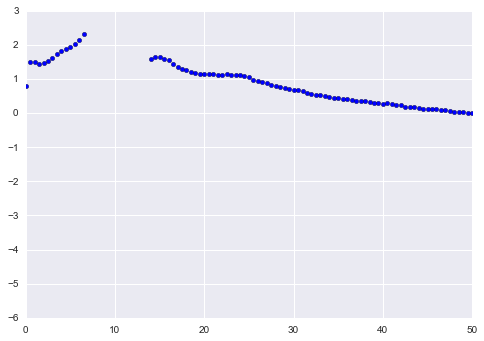

In [5]:
plt.scatter(filtered_f, np.log10(filtered_psd))
plt.xlim([0, 50])

In [66]:
filtered_psd.shape

(1004,)

In [13]:
filtered_f = filtered_f.reshape((len(filtered_f), 1))
filtered_psd = filtered_psd.reshape((len(filtered_psd), 1))

model = linear_model.RANSACRegressor(linear_model.LinearRegression())
model.fit(filtered_f[2*2:24*2], np.log10(filtered_psd)[2*2:24*2])
fit_line = model.predict(filtered_f)
slope = model.estimator_.coef_[0][0]

(0, 20)

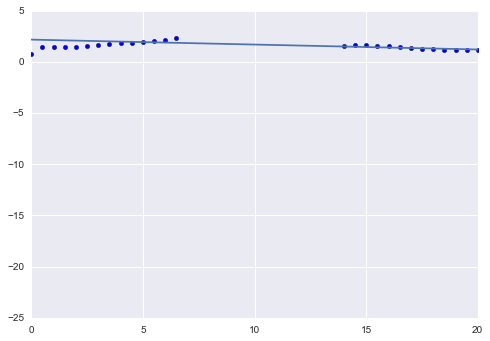

In [17]:
plt.scatter(filtered_f, np.log10(filtered_psd))
plt.plot(filtered_f, fit_line)
plt.xlim([0,20])

In [17]:
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

Estimated coefficients (true, normal, RANSAC):
82.1903908407869 [ 54.17236387] [ 82.08533159]


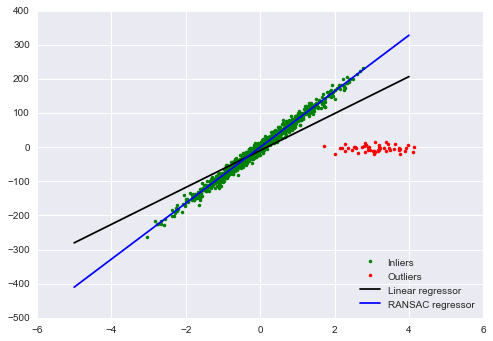

In [18]:
# Fit line using all data
model = linear_model.LinearRegression()
model.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(-5, 5)
line_y = model.predict(line_X[:, np.newaxis])
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

# Compare estimated coefficients
print("Estimated coefficients (true, normal, RANSAC):")
print(coef, model.coef_, model_ransac.estimator_.coef_)

plt.plot(X[inlier_mask], y[inlier_mask], '.g', label='Inliers')
plt.plot(X[outlier_mask], y[outlier_mask], '.r', label='Outliers')
plt.plot(line_X, line_y, '-k', label='Linear regressor')
plt.plot(line_X, line_y_ransac, '-b', label='RANSAC regressor')
plt.legend(loc='lower right')
plt.show()

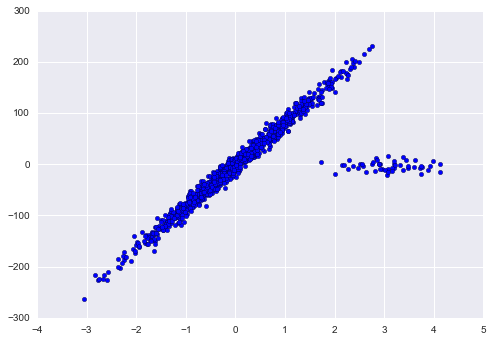

In [30]:
plt.scatter(X, y)

In [20]:
inlier_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [21]:
outlier_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [22]:
X

array([[  3.88202617e+00],
       [  3.20007860e+00],
       [  3.48936899e+00],
       [  4.12044660e+00],
       [  3.93377900e+00],
       [  2.51136106e+00],
       [  3.47504421e+00],
       [  2.92432140e+00],
       [  2.94839057e+00],
       [  3.20529925e+00],
       [  3.07202179e+00],
       [  3.72713675e+00],
       [  3.38051886e+00],
       [  3.06083751e+00],
       [  3.22193162e+00],
       [  3.16683716e+00],
       [  3.74703954e+00],
       [  2.89742087e+00],
       [  3.15653385e+00],
       [  2.57295213e+00],
       [  1.72350509e+00],
       [  3.32680930e+00],
       [  3.43221810e+00],
       [  2.62891749e+00],
       [  4.13487731e+00],
       [  2.27281716e+00],
       [  3.02287926e+00],
       [  2.90640807e+00],
       [  3.76638961e+00],
       [  3.73467938e+00],
       [  3.07747371e+00],
       [  3.18908126e+00],
       [  2.55610713e+00],
       [  2.00960177e+00],
       [  2.82604393e+00],
       [  3.07817448e+00],
       [  3.61514534e+00],
 

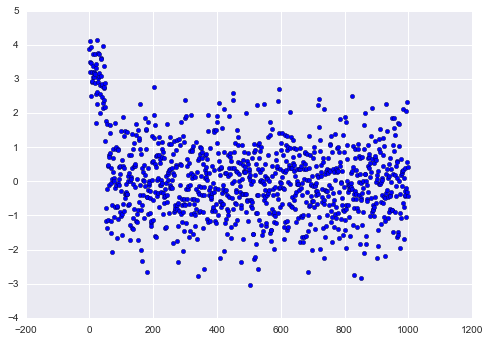

In [25]:
plt.scatter(range(0, len(X)), X)